In [ ]:
# from google.colab import files

# upload = files.upload()

# Importing Data

In [ ]:
import pandas as pd

# Kullandığımız veri setindeki satırları "|" ayıracı ile ayırıyoruz.
df = pd.read_csv('/content/preprocessed_train_40k.csv')
df = df[["text", "label"]]
df.head()

,text,label
0,gercekten sizin hikayelerinizi izleyerek mi ye...,0
1,coook cok bi baklava bi sen zaten,0
2,sn dukel ataturkun karma ile baslattigi siyasi...,0
3,konfederasyonumuzun aile ve sosyal politikalar...,0
4,hakemler tarih yaziyorlar kisiye karsi 32 onde...,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Veri seti hakkında bilgileri yazdırdık.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42398 entries, 0 to 42397
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    42396 non-null  object
 1   label   42398 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 662.6+ KB


([<matplotlib.patches.Wedge at 0x7ae4857b3e10>,
 [Text(-1.0941706636813076, -0.11309535242089684, 'Zararsiz'),
  Text(1.0941707077221812, 0.11309492633509963, 'Zararli')],
 [Text(-0.5968203620079859, -0.06168837404776191, '53.3%'),
  Text(0.5968203860302805, 0.06168814163732706, '46.7%')])

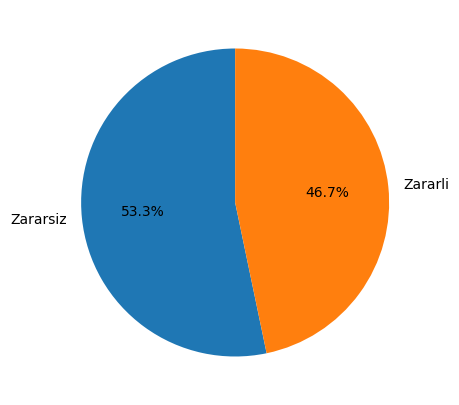

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 5)

# OTHER kategorisindeki veri adetini hesapladik.
positive = len(df[df['label'] == 0])
# (RACIST+INSULT+PROFANITY+SEXIST) kategorisindeki veri adetini hesapladik.
negative = len(df[df['label'] == 1])
# Dairesel grafikteki verilerimizi ayarladık.
pie_y = [positive, negative]
# Dairesel grafikteki verilerimizin adını ayarladık.
pie_labels = ["Zararsiz", "Zararli"]

# Dairesel grafiğimizi oluşturduk.
plt.pie(pie_y, labels=pie_labels, startangle=90, autopct='%1.1f%%')

# Her bir kategorideki veri adeti

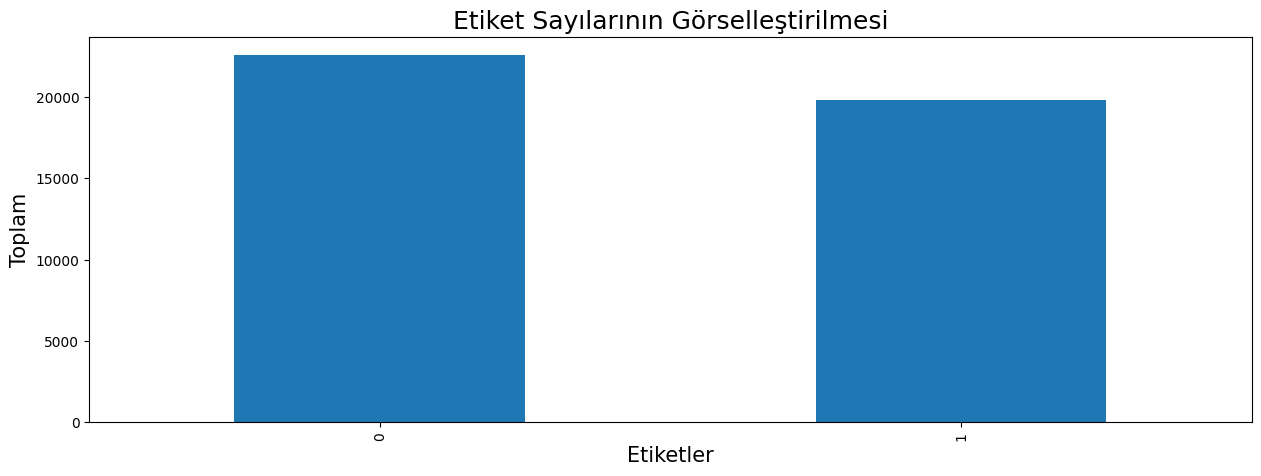

In [ ]:
from collections import Counter
# TARGET sütunundaki kategorileri bulduk.
tags = Counter(df["label"]).keys()
# TARGET sütunundaki kategorilerin adetini bulduk.
tags_len = Counter(df["label"]).values()

# Kategori ismi ve adet sayısını veri seti haline getirdik.
tag_df = pd.DataFrame(zip(tags, tags_len), columns=["Sinif", "Toplam"])
# Plot grafiğimizi oluşturduk.
tag_df.plot(x="Sinif", y="Toplam", kind="bar", legend=False, grid=False, figsize=(15,5))
# Plot grafiğimizin başlığını ayarladık.
plt.title("Etiket Sayılarının Görselleştirilmesi", fontsize=18)
# Plot grafiğimizin x ekseni başlığını ayarladık.
plt.xlabel("Etiketler", fontsize=15)
# Plot grafiğimizin y ekseni başlığını ayarladık.
plt.ylabel("Toplam", fontsize=15)
# Plot grafiğimizi ekrana yazdırdık.
plt.show()

# Temizlemeden önceki en sık kullanılan kelimeler

In [ ]:
import nltk
import string
# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

# Bir kategorideki en sık geçen kelimeleri bulmaya yarayan fonksiyonumuzu tanımladık.
def word_freq(CATEGORY):
  # Parametre olarak verilen kategoriyi kullanarak veri setimizi oluşturduk.
  freq_df = df[df['label'] == CATEGORY]
  # Kategorimizin text sınıfındaki satırlardaki kelimeleri bir değişkene aktardık.
  freq_words = freq_df["text"].tolist()
  # The error is likely due to some values in the "text" column being floats or NaNs.
  # This line converts all elements of freq_words to strings before applying lower(),
  # preventing the AttributeError.
  freq_words = [str(i).lower() for i in freq_words]
  freq_punc = []
  # Dizimizdeki kelimelerin sıklığındaki noktalama işaretlerini saydık.
  for o in freq_words:
    freq_punc += nltk.word_tokenize(o)
  freq_punc = [o for o in freq_punc if o not in string.punctuation]
  freq_freq = Counter(freq_punc)
  # En sık geçen 15 kelimeyi bir değişkene atadık.
  freq_top = freq_freq.most_common(15)


  words = [word for word, _ in freq_top]

  counts = [counts for _, counts in freq_top]

  # Sütun grafiğimizi oluşturduk.
  plt.bar(words, counts)
  # Sütun grafiğimizin başlığını ayarladık.
  plt.title(f"{CATEGORY} SINIFINDAKI EN SIK GECEN 15 KELIME")
  # Sütun grafiğimizin y ekseni başlığını ayarladık.
  plt.ylabel("Frekans")
  # Sütun grafiğimizin x ekseni başlığını ayarladık.
  plt.xlabel("Kelimeler")
  # Sütün grafiğimizi ekrana bastırdık.
  plt.show()

  # WordCloud'da kullanmak için en sık geçen kelimeleri döndürdük.
  return freq_top

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


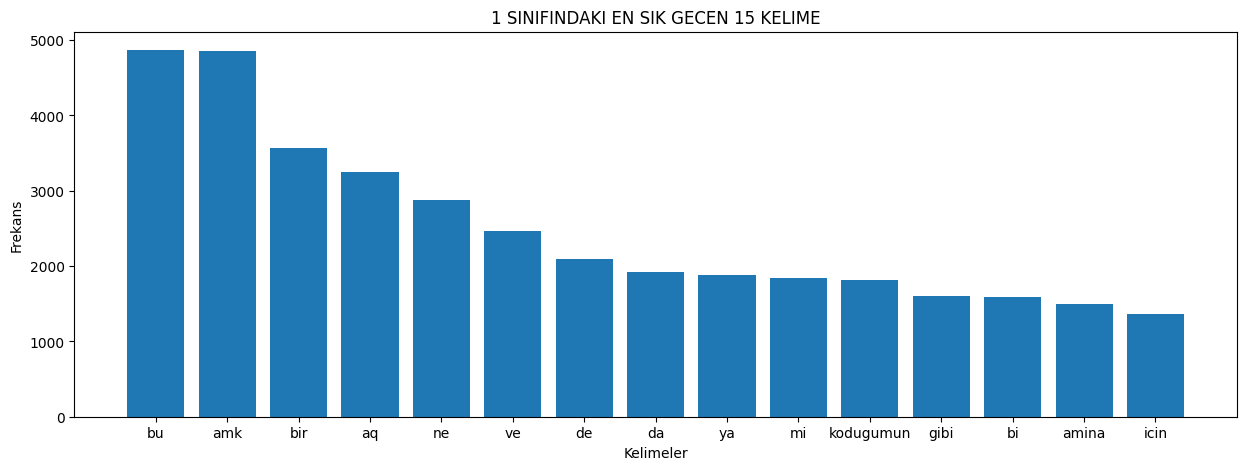

In [ ]:
# 1 kategorisindeki en sık geçen 15 kelimeyi gösteren grafiği ekrana yazdırdık.
negative_top = word_freq(1)

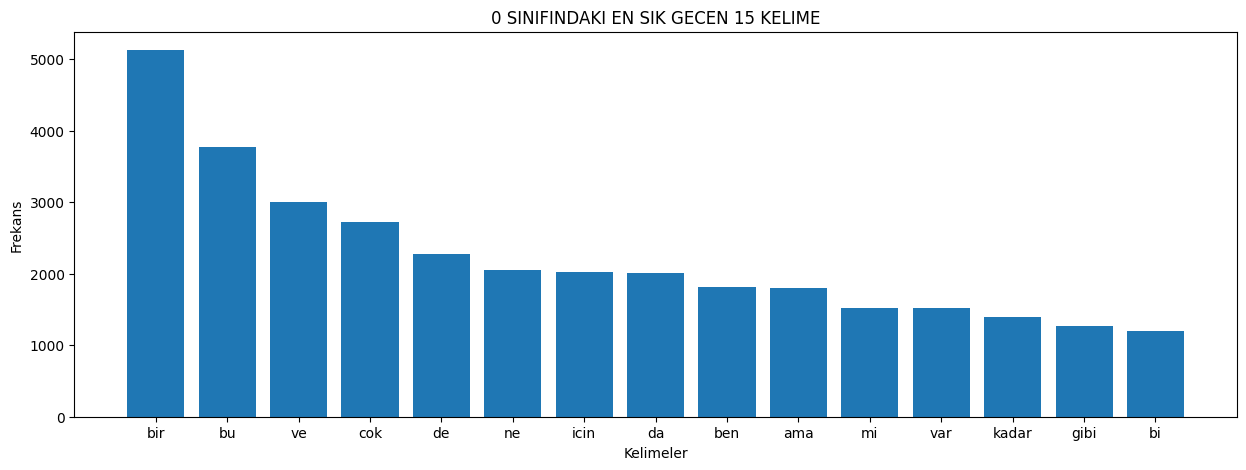

In [ ]:
# 0 kategorisindeki en sık geçen 15 kelimeyi gösteren grafiği ekrana yazdırdık.
positive_top = word_freq(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder kullanarak "target" sütunumuza dönüşüm yaptırdık.
le = LabelEncoder().fit(df["label"])
# "Name Mapping" işlemini tanımladık.
le_nm = dict(zip(le.classes_, le.transform(le.classes_)))
# Veri setimizde "labels" adında sütun oluşturarak "target" sütununa "Name Mapping" işlemi yaparak "labels" sütunu altına aktardık.
df["labels"] = df["label"].apply(lambda x: le_nm[x])
# "id", "text", "target" sütunlarını veri setimizden çıkardık.
df = df.drop(['label'], axis=1)

In [ ]:
import numpy as np
import torch
from transformers import BertTokenizer, BertModel

# Verilerimizi BERT'e uygun biçimde dönüştürmemiz gerekiyor. Bunu da Hugging Face'den önceden eğitilmiş "bert-base-turkish-uncased" modelini kullanarak yapıyoruz.
tokenizer = BertTokenizer.from_pretrained("dbmdz/bert-base-turkish-uncased")
labels = le_nm

class Dataset(torch.utils.data.Dataset):
    def __init__(self, df):
      # Kategorik sınıflar.
      self.labels = [label for label in df['labels']]
      # text = Modeli eğitmek için kullanılacak veri setindeki "clean_text" sütunundaki her bir satır.
      # padding = Her bir diziyi belirttiğimiz maksimum uzunluga kadar doldurmak için.
      # max_length = Her bir dizinin maksimum uzunluğu
      # truncation = Eğer değeri "True" ise dizimiz maksimum uzunluğu aşar ise onu keser.
      # return_tensors = Döndürelecek tensörlerin türü. Pytorch kullandığımız için "pt" yazıyoruz. Tensorflow kullansaydık "tf" yazmamız gerekirdi.
      df['text'] = df['text'].astype(str)
      self.text = [tokenizer(text, padding='max_length', max_length=512, truncation=True, return_tensors="pt") for text in df['text']]

    def classes(self):
      return self.labels

    def __len__(self):
      return len(self.labels)

    def get_batch_labels(self, idx):
      # Bir grup etiket getir.
      return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
      # Bir grup girdi getir.
      return self.text[idx]

    def __getitem__(self, idx):
      batch_texts = self.get_batch_texts(idx)
      batch_y = self.get_batch_labels(idx)

      return batch_texts, batch_y

In [ ]:
def train_validate_test_split(df):
    # Rastgelelik durumu.
    np.random.seed(4242)
    # Diziyi rastgele permute eder.
    perm = np.random.permutation(df.index)
    # Veri setinin %60'ının sayısal değeri hesaplandı.
    train_end = int(.6 * len(df.index))
    # Veri setinin %20'sinin sayısal değeri hesaplandı.
    validate_end = int(.2 * len(df.index)) + train_end
    # Veri setinin %60'ını train etmek için ayırdık.
    train = df.iloc[perm[:train_end]]
    # Veri setinin %20'sini validation etmek için ayırdık.
    validate = df.iloc[perm[train_end:validate_end]]
    # Veri setinin %20'sini test etmek için ayırdık.
    test = df.iloc[perm[validate_end:]]
    # train, validation, test veri setlerini döndür.
    return train, validate, test

# Train, Validation ve Test için veri setlerimiz oluşturduk.
df_train, df_validation, df_test = train_validate_test_split(df)
# Train, Validation ve Test için oluşturduğumuz veri setlerinin uzunluğunu ekrana yazdırdık. (%60 - %20 - %20)
print(len(df_train), len(df_validation), len(df_test))

25438 8479 8481


In [ ]:
class BertClassifier(torch.nn.Module):
  def __init__(self, dropout=0.5):
    super(BertClassifier, self).__init__()

    self.bert = BertModel.from_pretrained("dbmdz/bert-base-turkish-uncased")
    self.dropout = torch.nn.Dropout(dropout)
    # Kullandığımız önceden eğilmiş model "base" sınıfına ait bir BERT modelidir. Yani;
    # 12 layers of Transformer encoder, 12 attention heads, 768 hidden size, 110M parameters.
    # 768, BERT-base modelindeki hidden size'yi, 2 ise veri setimizdek  i toplam kategori sayısını temsil ediyor.
    self.linear = torch.nn.Linear(768, 2)
    self.relu = torch.nn.ReLU()

  def forward(self, input_id, mask):
    # _ değişkeni dizideki tüm belirteçlerin gömme vektörlerini içerir.
    # pooled_output değişkeni [CLS] belirtecinin gömme vektörünü içerir.
    # Metin sınıflandırma için polled_output değişkenini girdi olarak kullanmak yeterlidir.

    # Attention mask, bir belirtecin gercek bir kelimemi yoksa dolgu mu olduğunu tanımlar.
    # Eğer gerçek bir kelime ise attention_mask=1, eğer dolgu ise attention_mask=0 olacaktır.
    # return_dict, değeri "True ise" bir BERT modeli tahmin, eğitim veya değerlendirme sırasında ortaya çıkan
    # loss, logits, hidden_states ve attentions dan oluşan bir tuple oluşturacaktır.
    _, pooled_output = self.bert(input_ids=input_id, attention_mask=mask, return_dict=False)
    dropout_output = self.dropout(pooled_output)
    linear_output = self.linear(dropout_output)
    final_layer = self.relu(linear_output)

    return final_layer

In [ ]:
# Eğitim tur sayısı
EPOCHS = 1
# BERT model tanımlaması.
model = BertClassifier()
# Öğrenme oranı
LR = 1e-6

# Train ve Validation için ayırdığımız veri setlerini
train, validation = Dataset(df_train), Dataset(df_validation)

# Verilerin toplu olarak içe aktarılması için DataLoader kullanıyoruz.
# batch_size, model güncellenmeden önce işlenen örnek sayısıdır.
# shuffle, karıştır.
tdl = torch.utils.data.DataLoader(train, batch_size=2, shuffle=True)
vdl = torch.utils.data.DataLoader(validation, batch_size=2)
device = torch.device("cuda")

# Çok sınıflı sınıflandırma kullandığımız için çapraz entropi kullanmamız gerekiyor.
criterion = torch.nn.CrossEntropyLoss().cuda()
# Optimizer için Adam kullanıyoruz.
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
model = model.cuda()

for EPOCH in range(EPOCHS):
    # Toplam eğitim doğruluğu
    total_train_accuracy = 0
    # Toplam eğitim kaybı
    total_train_loss = 0
    # Toplam validation doğruluğu
    total_validation_accuracy = 0
    # Toplam validation kaybı
    total_validation_loss = 0

    # tqdm kütüphanesi, "Progress Bar" oluşturmaya yarar.
    from tqdm import tqdm
    for train_input, train_label in tqdm(tdl):
        # Modelin verileri işleyebilmesi için hem modelin hem de verilerin CPU veya GPU olmak üzere aynı cihazda olması gerekir.
        # Örneğin veriler CPU'da, model GPU'da olursa çalışma zamanı hatası oluşacaktır.
        # Bunu önlemek için pytorch kütüphanesinden "to" fonksiyonunu kullanıyoruz.
        train_label = train_label.to(device)

        # Attention mask, bir belirtecin gercek bir kelimemi yoksa dolgu mu olduğunu tanımlar.
        # Eğer gerçek bir kelime ise attention_mask=1, eğer dolgu ise attention_mask=0 olacaktır.
        mask = train_input['attention_mask'].to(device)
        # input_ids, her bir tokenin id gösterimidir.
        input_id = train_input['input_ids'].squeeze(1).to(device)

        # Modelin eğitim verileri üzerindeki tahminlerinin sonuçları saklanır.
        output = model(input_id, mask)

        # Çapraz entropi ile örneklem kaybını hesaplıyoruz.
        batch_loss = criterion(output, train_label.long())
        # Her bir epoch için toplam train kaybını bulmak için her bir örneklemin train kaybını topluyoruz.
        total_train_loss += batch_loss.item()

        # "output" değişkenindeki her bir veri örneği için çıktı tensöründe en yüksek olasılığa sahip
        # sınıfın indexini döndürür. Daha sonra "train_label" adlı tensörde modein doğru sınıf tahmilnerinin
        # bulunduğu etiketleri saklanır. Doğru tahmin edilen sınıfların sayısı hesaplanır ve "item"
        # fonksiyonu ile sayısal bir değere dönüştürülür.
        train_accuracy = (output.argmax(dim=1) == train_label).sum().item()
        # Her bir epoch için toplam train doğruluğunu bulmak için her bir örneklemin doğruluk kaybını topluyoruz.
        total_train_accuracy += train_accuracy

        # Gradyanlar, modelin kaybını optimize etmek için geriye doğru hesaplanır ve eğitim adımlarında kullanılır.
        # Pytorch'da Gradyanlar biriktirilir ve önceki gradyan üzerine eklenir. Bu nedenle, modelin bir sonraki eğitim
        # adımında geçerli gradyan değerlerini kullanabilmesi için, gradyanların önce sıfırlanması gerekir.
        # Bu işlemi de "zero_grad" fonksiyonunu kullanarak yapıyoruz.
        model.zero_grad()

        # Kayıp fonksiyonunun gradyanını hesaplamak ve bu gradyanı kullanarak modelin ağırlıklarının güncellenmesi için
        # geriye doğru geçiş (backpropagation) işlemini başlatıyoruz.
        batch_loss.backward()

        #step(), optimize edicinin güncellemesi gereken tüm tensörler üzerinde yineleme yapmasını ve değerlerini güncellemek için dahili olarak depolanan gradlarını kullanmasını sağlar
        optimizer.step()

    # Doğrulama işlemi sırasında model ağırlıklarını değiştirmeyeceğimiz modelin gradyanlara ihtiyacı yoktur
    # "no_grad" fonksiyonu ile gradyan hesaplarını devre dışı bırakıyoruz.
    with torch.no_grad():
        # tqdm kütüphanesi, "Progress Bar" oluşturmaya yarar.
        for val_input, val_label in tqdm(vdl):
            # Modelin verileri işleyebilmesi için hem modelin hem de verilerin CPU veya GPU olmak üzere aynı cihazda olması gerekir.
            # Örneğin veriler CPU'da, model GPU'da olursa çalışma zamanı hatası oluşacaktır.
            # Bunu önlemek için pytorch kütüphanesinden "to" fonksiyonunu kullanıyoruz.
            val_label = val_label.to(device)

            # Attention mask, bir belirtecin gercek bir kelimemi yoksa dolgu mu olduğunu tanımlar.
            # Eğer gerçek bir kelime ise attention_mask=1, eğer dolgu ise attention_mask=0 olacaktır.
            mask = val_input['attention_mask'].to(device)
            input_id = val_input['input_ids'].squeeze(1).to(device)

            # Modelin eğitim verileri üzerindeki tahminlerinin sonuçları saklanır.
            output = model(input_id, mask)

            # Çapraz entropi ile örneklem kaybını hesaplıyoruz.
            batch_loss = criterion(output, val_label.long())
            # Her bir epoch için toplam train kaybını bulmak için her bir örneklemin train kaybını topluyoruz.
            total_validation_loss += batch_loss.item()

            # "output" değişkenindeki her bir veri örneği için çıktı tensöründe en yüksek olasılığa sahip
            # sınıfın indexini döndürür. Daha sonra "train_label" adlı tensörde modein doğru sınıf tahmilnerinin
            # bulunduğu etiketleri saklanır. Doğru tahmin edilen sınıfların sayısı hesaplanır ve "item"
            # fonksiyonu ile sayısal bir değere dönüştürülür.
            validation_accuracy = (output.argmax(dim=1) == val_label).sum().item()
            # Her bir epoch için toplam train doğruluğunu bulmak için her bir örneklemin doğruluk kaybını topluyoruz.
            total_validation_accuracy += validation_accuracy

    # Mevcut Epoch
    print(f'Epochs: {EPOCH + 1}')
    # Train Kaybı
    print(f'Train Loss: {total_train_loss / len(df_train): .4f}')
    # Train Dogruluk
    print(f'Train Accuracy: {total_train_accuracy / len(df_train): .4f}')
    # Validation Kaybı
    print(f'Validation Loss: {total_validation_loss / len(df_validation): .4f}')
    # Validation Dogruluk
    print(f'Validation Accuracy: {total_validation_accuracy / len(df_validation): .4f}')

Train Loss:  0.1570
Train Accuracy:  0.8679
Validation Loss:  0.1151
Validation Accuracy:  0.9100


In [ ]:
# Test için ayırdığımız veri setlerini
test = Dataset(df_test)

# Verilerin toplu olarak içe aktarılması için DataLoader kullanıyoruz.
# batch_size, model güncellenmeden önce işlenen örnek sayısıdır.
# shuffle, karıştır.
tdl = torch.utils.data.DataLoader(test, batch_size=2)
device = torch.device("cuda")
model = model.cuda()

# Toplam test doğruluğu
total_test_accuracy = 0

# Test işlemi sırasında model ağırlıklarını değiştirmeyeceğimiz modelin gradyanlara ihtiyacı yoktur
# "no_grad" fonksiyonu ile gradyan hesaplarını devre dışı bırakıyoruz.
with torch.no_grad():
  for test_input, test_label in tdl:
    # Modelin verileri işleyebilmesi için hem modelin hem de verilerin CPU veya GPU olmak üzere aynı cihazda olması gerekir.
    # Örneğin veriler CPU'da, model GPU'da olursa çalışma zamanı hatası oluşacaktır.
    # Bunu önlemek için pytorch kütüphanesinden "to" fonksiyonunu kullanıyoruz.
    test_label = test_label.to(device)

    # Attention mask, bir belirtecin gercek bir kelimemi yoksa dolgu mu olduğunu tanımlar.
    # Eğer gerçek bir kelime ise attention_mask=1, eğer dolgu ise attention_mask=0 olacaktır.
    mask = test_input['attention_mask'].to(device)
    # squeeze() fonksiyonu ile "input_ids" özelliğindeki tensörlerin boyutu 1 olan boyutları
    # kaldırarak, tensörün boyutunu azaltıyoruz.
    input_id = test_input['input_ids'].squeeze(1).to(device)

    # Modelin eğitim verileri üzerindeki tahminlerinin sonuçları saklanır.
    output = model(input_id, mask)

    # "output" değişkenindeki her bir veri örneği için çıktı tensöründe en yüksek olasılığa sahip
    # sınıfın indexini döndürür. Daha sonra "test_label" adlı tensörde modein doğru sınıf tahmilnerinin
    # bulunduğu etiketleri saklanır. Doğru tahmin edilen sınıfların sayısı hesaplanır ve "item"
    # fonksiyonu ile sayısal bir değere dönüştürülür.
    test_accuracy = (output.argmax(dim=1) == test_label).sum().item()
    # Her bir epoch için toplam test doğruluğunu bulmak için her bir örneklemin doğruluk kaybını topluyoruz.
    total_test_accuracy += test_accuracy

# Test Dogruluğu
print(f'Test Accuracy: {total_test_accuracy / len(tdl): .3f}')

<ipython-input-11-f8e866449052>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].astype(str)


Test Accuracy:  1.824


In [ ]:
# Prediction fonksiyonunu tanımladık.
def predict(model, sentence):
  device = torch.device("cuda")
  model = model.cuda()
  # Prediction işlemi sırasında model ağırlıklarını değiştirmeyeceğimiz modelin gradyanlara ihtiyacı yoktur
  # "no_grad" fonksiyonu ile gradyan hesaplarını devre dışı bırakıyoruz.
  with torch.no_grad():
    # text = Modeli eğitmek için kullanılacak veri setindeki "clean_text" sütunundaki her bir satır.
    # padding = Her bir diziyi belirttiğimiz maksimum uzunluga kadar doldurmak için.
    # max_length = Her bir dizinin maksimum uzunluğu
    # truncation = Eğer değeri "True" ise dizimiz maksimum uzunluğu aşar ise onu keser.
    # return_tensors = Döndürelecek tensörlerin türü. Pytorch kullandığımız için "pt" yazıyoruz. Tensorflow kullansaydık "tf" yazmamız gerekirdi.
    input_id = tokenizer(sentence, padding='max_length', max_length = 512, truncation=True, return_tensors="pt")

    # Attention mask, bir belirtecin gercek bir kelimemi yoksa dolgu mu olduğunu tanımlar.
    # Eğer gerçek bir kelime ise attention_mask=1, eğer dolgu ise attention_mask=0 olacaktır.
    mask = input_id['attention_mask'].to(device)

    # squeeze() fonksiyonu ile "input_ids" özelliğindeki tensörlerin boyutu 1 olan boyutları
    # kaldırarak, tensörün boyutunu azaltıyoruz.
    input_id = input_id['input_ids'].squeeze(1).to(device)

    # Modelin eğitim verileri üzerindeki tahminlerinin sonuçları saklanır.
    output = model(input_id, mask)

    # Kategorik sınıfı döndür.
    return output.argmax(dim=1).item()

In [ ]:
from sklearn.metrics import classification_report

# Her bir dizi için tahmin yapılır
actuals = df_test.labels
predicted = [predict(model, text) for text in df_test['text'].values]

print(classification_report(actuals, predicted))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      4498
           1       0.90      0.91      0.90      3983

    accuracy                           0.91      8481
   macro avg       0.91      0.91      0.91      8481
weighted avg       0.91      0.91      0.91      8481



In [ ]:
predict(model, "")

0

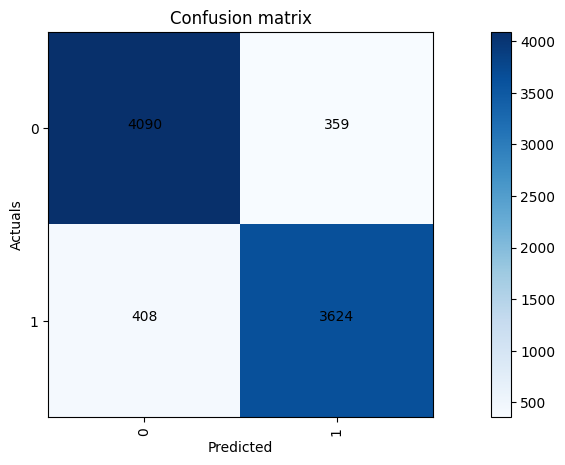

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(predicted, actuals, sub_classes, title='Confusion matrix', cmap=plt.cm.Blues):
    # Confusion Matrix oluştur.
    confusion = confusion_matrix(predicted, actuals)

    # interpolation -> Grafikte kullanılacak renklerin aralığı
    # cmap -> Grafikte kullanılacak renk
    plt.imshow(confusion, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    # Alt sınıfların sayısına göre bir numpy dizisi oluşturduk.
    # Bu diziyi sınıf etiketlerinin eksenlerdeki konumlarını belirlemek için kullanacağız.
    tick_marks = np.arange(len(sub_classes))
    # rotation -> X ekseni işaretleyicilerinin açısı
    plt.xticks(tick_marks, sub_classes, rotation=90)
    plt.yticks(tick_marks, sub_classes)

    for i, j in itertools.product(range(confusion.shape[0]), range(confusion.shape[1])):
        # horizontalalignment, yazılacak sayısal değerin hücre ortasında yer almasını sağlar.
        # color, yazı rengini belirler.
        # j -> x koordinatı
        # i -> y koordinatı
        # confusion[i, j] -> yazılacak sayısal değer
        plt.text(j, i, confusion[i, j], horizontalalignment="center", color="black")

    # Figür boyutu
    plt.rcParams["figure.figsize"] = (15,5)
    # y Ekseni adı
    plt.ylabel('Actuals')
    # x Ekseni adı
    plt.xlabel('Predicted')
    #plt.savefig("cm_matrix.png")
    plt.show()

plot_confusion_matrix(predicted, actuals, sub_classes=le_nm.keys())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Modelimize isim vererek Drive'a kaydettik.
model_name = "bertVia40k.pt"
path = F"/content/drive/My Drive/{model_name}"

torch.save(model.state_dict(), path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
